In [89]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [90]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

In [91]:
x_train.shape

(60000, 28, 28)

In [92]:
t_train.shape

(60000,)

In [93]:
x_test.shape

(10000, 28, 28)

In [94]:
t_test.shape

(10000,)

In [95]:
t_train[0]


5

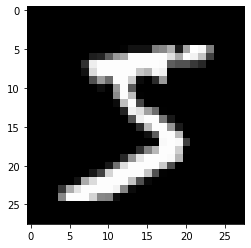

In [96]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

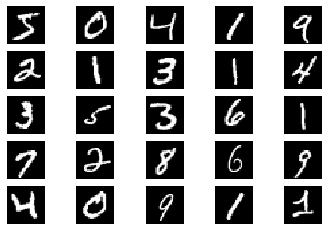

In [97]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# data 전처리

In [98]:
# 학습데이터 / 테스트 데이터 전처리
x_train = (x_train - 0.0)/255
x_test = (x_test - 0.0) / 255

0.0 1.0


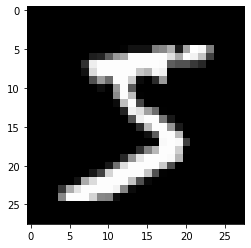

In [99]:
print(np.min(x_train), np.max(x_train))
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [100]:
print(x_train.dtype, x_test.dtype)

float64 float64


In [101]:
print(t_train.shape, t_test.shape)

(60000,) (10000,)


In [102]:
# One-hot encoding
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [103]:
print(t_train.shape, t_test.shape)

(60000, 10) (10000, 10)


In [104]:
#one-hot encoding 되었음을 알 수 있다.
print(t_train[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# model 구축, compile

In [105]:
model = tf.keras.Sequential()


# Layer add

In [107]:
#28 * 28 크기의 2차원 이미지를 784개의 1차원 벡터로 변환
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [108]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy',metrics=['accuracy'])


In [109]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [110]:
# validation_split값은, training data에서 "얼마만큼의 비율"로 validation data생성 후, 
# 오버피팅 확인할지를 정하는 것
hist = model.fit(x_train, t_train, epochs=30, validation_split = 0.3)
# model.fit함수의 return 값은 hist.history['loss'] 그리고, hist.history['accuracy']와
#같이 저장된다.

Epoch 1/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5197 - accuracy: 0.8534 - val_loss: 0.1846 - val_accuracy: 0.9474
Epoch 2/30
1313/1313 [==============================] - 1s 901us/step - loss: 0.1555 - accuracy: 0.9535 - val_loss: 0.1415 - val_accuracy: 0.9600
Epoch 3/30
1313/1313 [==============================] - 1s 902us/step - loss: 0.1068 - accuracy: 0.9676 - val_loss: 0.1204 - val_accuracy: 0.9654
Epoch 4/30
1313/1313 [==============================] - 1s 975us/step - loss: 0.0719 - accuracy: 0.9798 - val_loss: 0.1112 - val_accuracy: 0.9682
Epoch 5/30
1313/1313 [==============================] - 1s 926us/step - loss: 0.0579 - accuracy: 0.9827 - val_loss: 0.1068 - val_accuracy: 0.9683
Epoch 6/30
1313/1313 [==============================] - 1s 943us/step - loss: 0.0448 - accuracy: 0.9868 - val_loss: 0.1113 - val_accuracy: 0.9678
Epoch 7/30
1313/1313 [==============================] - 1s 947us/step - loss: 0.0377 - accuracy: 0.9890 - val_loss: 0.0975 - v

In [111]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 529us/step - loss: 0.1406 - accuracy: 0.9761


[0.1405981034040451, 0.9761000275611877]

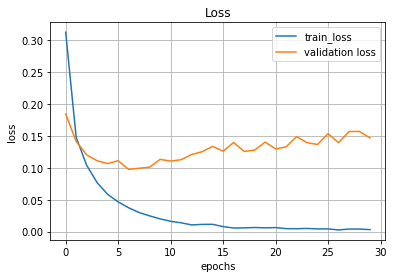

In [112]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

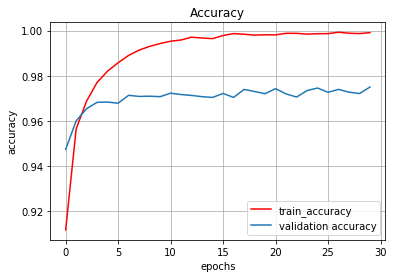

In [113]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train_accuracy',color = 'red')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')
plt.show()

# 혼동행렬( confusion matrix)

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

(10000, 28, 28)
(10000, 10)
(10000, 10)
(10, 10)


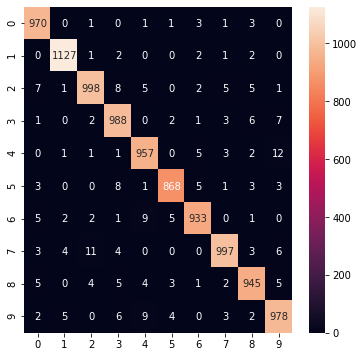

In [121]:
plt.figure(figsize=(6,6))

print(x_test.shape)
# model.predict(테스트데이터) ==> 만든 model을 통해 나온 결과를 return ( one-hot encoding형태로 !!!)
predicted_value = model.predict(x_test)

print(predicted_value.shape)
print(t_test.shape)

#confusion_matrix ==>  predict한 값과, 
cm = confusion_matrix(np.argmax(t_test, axis=-1),
                     np.argmax(predicted_value, axis = -1))
print(cm.shape)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [116]:
print(cm)
print()
for i in range(10):
    print(('label = %d\t ( %d / %d) \taccuracy = %.3f') %
         (i, np.max(cm[i]), np.sum(cm[i]), np.max(cm[i])/np.sum(cm[i])))

[[ 970    0    1    0    1    1    3    1    3    0]
 [   0 1127    1    2    0    0    2    1    2    0]
 [   7    1  998    8    5    0    2    5    5    1]
 [   1    0    2  988    0    2    1    3    6    7]
 [   0    1    1    1  957    0    5    3    2   12]
 [   3    0    0    8    1  868    5    1    3    3]
 [   5    2    2    1    9    5  933    0    1    0]
 [   3    4   11    4    0    0    0  997    3    6]
 [   5    0    4    5    4    3    1    2  945    5]
 [   2    5    0    6    9    4    0    3    2  978]]

label = 0	 ( 970 / 980) 	accuracy = 0.990
label = 1	 ( 1127 / 1135) 	accuracy = 0.993
label = 2	 ( 998 / 1032) 	accuracy = 0.967
label = 3	 ( 988 / 1010) 	accuracy = 0.978
label = 4	 ( 957 / 982) 	accuracy = 0.975
label = 5	 ( 868 / 892) 	accuracy = 0.973
label = 6	 ( 933 / 958) 	accuracy = 0.974
label = 7	 ( 997 / 1028) 	accuracy = 0.970
label = 8	 ( 945 / 974) 	accuracy = 0.970
label = 9	 ( 978 / 1009) 	accuracy = 0.969
